In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/url_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.drop(["FILENAME"], axis=1,inplace=True)

## Data balancing

In [ ]:
class_distribution = df['label'].value_counts()

print("Class distribution:\n", class_distribution)

# Calculate percentage distribution
class_percentage = df['label'].value_counts(normalize=True) * 100
print("\nPercentage distribution:\n", class_percentage)


Class distribution:
 label
1    134850
0    100945
Name: count, dtype: int64

Percentage distribution:
 label
1    57.189508
0    42.810492
Name: proportion, dtype: float64


In [ ]:
#%pip install imbalanced-learn


In [ ]:
#%pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Features and target variable
# X = df.drop('label', axis=1)
# y = df['label']

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X, y)

# # Combine the resampled features and target variable into a DataFrame
# balanced_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote, columns=['label'])], axis=1)

# print("Balanced class distribution:\n", balanced_data['label'].value_counts())


In [ ]:
phishing = df[df["label"]==1]
non_phishing = df[df["label"]==0]
# print(phishing)

In [ ]:
from sklearn.utils import resample
# Undersample the majority class
phishing_undersampled = resample(phishing,
                                 replace=False,   # Sample without replacement
                                 n_samples=len(non_phishing), # Match number of non-phishing samples
                                 random_state=42) # Reproducibility

# Combine undersampled phishing with original non-phishing data
balanced_data = pd.concat([phishing_undersampled, non_phishing])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced class distribution:\n", balanced_data['label'].value_counts())


Balanced class distribution:
 1    100945
0    100945
Name: label, dtype: int64


## Data familarizing

In [ ]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201890 entries, 0 to 201889
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         201890 non-null  object 
 1   URLLength                   201890 non-null  int64  
 2   Domain                      201890 non-null  object 
 3   DomainLength                201890 non-null  int64  
 4   IsDomainIP                  201890 non-null  int64  
 5   TLD                         201890 non-null  object 
 6   URLSimilarityIndex          201890 non-null  float64
 7   CharContinuationRate        201890 non-null  float64
 8   TLDLegitimateProb           201890 non-null  float64
 9   URLCharProb                 201890 non-null  float64
 10  TLDLength                   201890 non-null  int64  
 11  NoOfSubDomain               201890 non-null  int64  
 12  HasObfuscation              201890 non-null  int64  
 13  NoOfObfuscated

In [ ]:
balanced_data.shape

(201890, 55)

In [ ]:
balanced_data.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [ ]:
df=balanced_data
df.shape

(201890, 55)

## visualizing

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

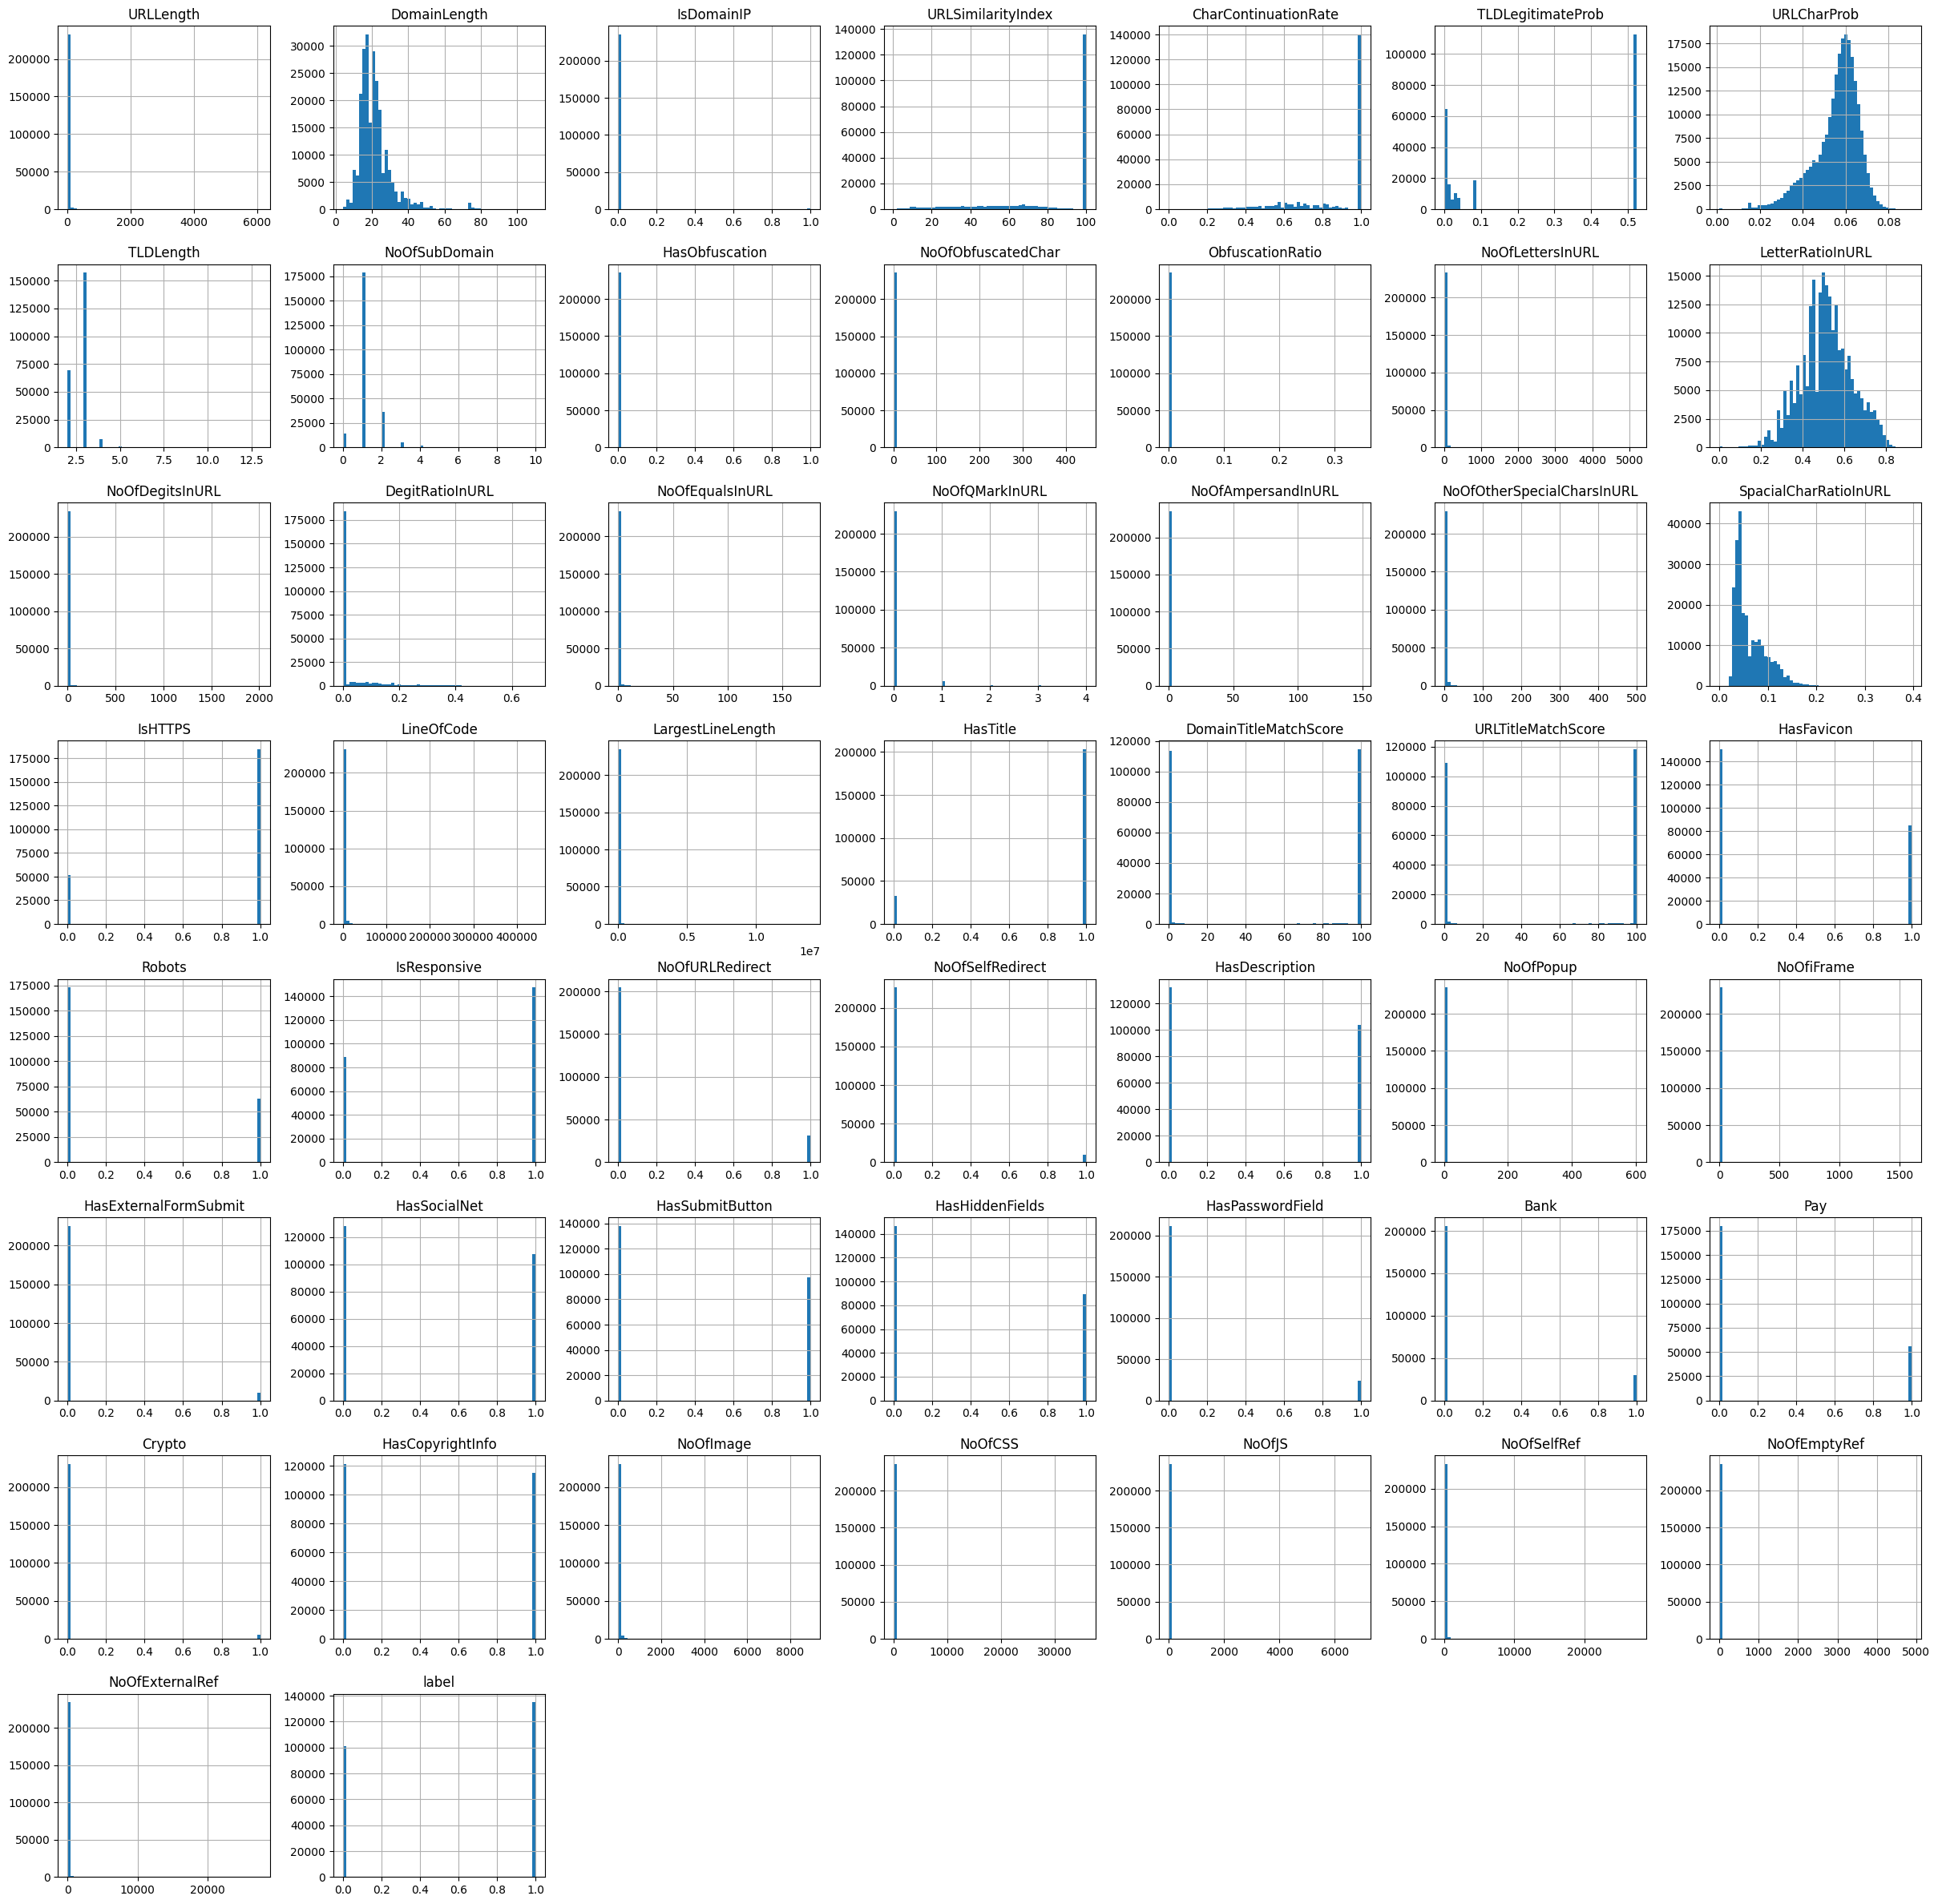

In [ ]:
df.hist(bins=60,figsize=(30,30))
plt.show()

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

ValueError: could not convert string to float: 'https://www.southbankmosaics.com'

<Figure size 1500x1300 with 0 Axes>

In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation values for the 'label' column
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

print("Correlation of all columns with 'label':\n", label_correlation)


ValueError: could not convert string to float: 'https://www.southbankmosaics.com'

### Point Biserial Correlation (for binary classification)

In [ ]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation for each numeric feature with the label
correlations = {}
for column in df.drop('label', axis=1).select_dtypes(include=['number']).columns:
    correlations[column], _ = pointbiserialr(df[column], df['label'])

# Sort correlations in descending order
correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

print("Point Biserial Correlation of all numeric features with 'label':\n", correlations)


Point Biserial Correlation of all numeric features with 'label':
 {'URLSimilarityIndex': 0.8603580349950478, 'HasSocialNet': 0.7842545048611291, 'HasCopyrightInfo': 0.7433575121575651, 'HasDescription': 0.6902317838721045, 'IsHTTPS': 0.6091318990621848, 'DomainTitleMatchScore': 0.58490458154694, 'HasSubmitButton': 0.5785609362364279, 'IsResponsive': 0.5486075477020952, 'URLTitleMatchScore': 0.5394186582391132, 'SpacialCharRatioInURL': -0.5335367395646039, 'HasHiddenFields': 0.5077314631770089, 'HasFavicon': 0.4937106614080138, 'URLCharProb': 0.4697485899604052, 'CharContinuationRate': 0.467735299834097, 'HasTitle': 0.4597246819667584, 'DegitRatioInURL': -0.43203214846933524, 'Robots': 0.39261993295672315, 'NoOfJS': 0.3735000743129704, 'LetterRatioInURL': -0.3677943369422825, 'Pay': 0.3597465577665234, 'NoOfOtherSpecialCharsInURL': -0.3588907898975935, 'NoOfSelfRef': 0.31621093459414684, 'DomainLength': -0.28315188979710243, 'NoOfImage': 0.2746576771104945, 'LineOfCode': 0.2722569038851

In [ ]:
from sklearn.feature_selection import mutual_info_classif
columns = df.select_dtypes(include=['object']).columns
# Features and target variable
X = df.drop('label', axis=1)
X = X.drop(columns, axis=1)
y = df['label']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information of all features with 'label':\n", mutual_info_df)


Mutual Information of all features with 'label':
                        Feature  Mutual Information
3           URLSimilarityIndex            0.680166
22                  LineOfCode            0.601026
49             NoOfExternalRef            0.561347
44                   NoOfImage            0.543009
47                 NoOfSelfRef            0.527345
46                      NoOfJS            0.501565
23           LargestLineLength            0.489161
45                     NoOfCSS            0.447088
36                HasSocialNet            0.416898
13            LetterRatioInURL            0.382891
43            HasCopyrightInfo            0.352970
32              HasDescription            0.306830
21                     IsHTTPS            0.257211
19  NoOfOtherSpecialCharsInURL            0.243291
25       DomainTitleMatchScore            0.219319
37             HasSubmitButton            0.210719
20       SpacialCharRatioInURL            0.206655
5            TLDLegitimateProb  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

##### Droping low familiar features


In [ ]:
low_mi_features = mutual_info_df[mutual_info_df["Mutual Information"] < 0.2]["Feature"]
low_mi_features


5         TLDLegitimateProb
26       URLTitleMatchScore
29             IsResponsive
48             NoOfEmptyRef
34               NoOfiFrame
14          NoOfDegitsInURL
15          DegitRatioInURL
4      CharContinuationRate
0                 URLLength
38          HasHiddenFields
27               HasFavicon
12         NoOfLettersInURL
24                 HasTitle
6               URLCharProb
28                   Robots
1              DomainLength
41                      Pay
8             NoOfSubDomain
7                 TLDLength
33                NoOfPopup
40                     Bank
17           NoOfQMarkInURL
35    HasExternalFormSubmit
16          NoOfEqualsInURL
39         HasPasswordField
42                   Crypto
18       NoOfAmpersandInURL
31         NoOfSelfRedirect
30          NoOfURLRedirect
9            HasObfuscation
10       NoOfObfuscatedChar
2                IsDomainIP
11         ObfuscationRatio
Name: Feature, dtype: object

In [ ]:
low_mi_features.to_list()

['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'NoOfEmptyRef',
 'NoOfiFrame',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'CharContinuationRate',
 'URLLength',
 'HasHiddenFields',
 'HasFavicon',
 'NoOfLettersInURL',
 'HasTitle',
 'URLCharProb',
 'Robots',
 'DomainLength',
 'Pay',
 'NoOfSubDomain',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'NoOfQMarkInURL',
 'HasExternalFormSubmit',
 'NoOfEqualsInURL',
 'HasPasswordField',
 'Crypto',
 'NoOfAmpersandInURL',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'HasObfuscation',
 'NoOfObfuscatedChar',
 'IsDomainIP',
 'ObfuscationRatio']

In [ ]:
high_mi_features = mutual_info_df[mutual_info_df["Mutual Information"] > 0.2]["Feature"]
high_mi_features


3             URLSimilarityIndex
22                    LineOfCode
49               NoOfExternalRef
44                     NoOfImage
47                   NoOfSelfRef
46                        NoOfJS
23             LargestLineLength
45                       NoOfCSS
36                  HasSocialNet
13              LetterRatioInURL
43              HasCopyrightInfo
32                HasDescription
21                       IsHTTPS
19    NoOfOtherSpecialCharsInURL
25         DomainTitleMatchScore
37               HasSubmitButton
20         SpacialCharRatioInURL
Name: Feature, dtype: object

In [ ]:
high_mi_features.count()

17

Dropping low features except IsDomainIP,Robots,NoOfSubDomain,NoOfAmpersandInURL

In [ ]:
m_df = df.drop(['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'NoOfEmptyRef',
 'NoOfiFrame',
 'DegitRatioInURL',
 'CharContinuationRate',
 'NoOfDegitsInURL',
 'URLLength',
 'HasHiddenFields',
 'HasFavicon',
 'NoOfLettersInURL',
 'HasTitle',
 'URLCharProb',
 'DomainLength',
 'Pay',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'HasExternalFormSubmit',
 'NoOfQMarkInURL',
 'NoOfEqualsInURL',
 'HasPasswordField',
 'Crypto',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'NoOfObfuscatedChar',
 'HasObfuscation',
 'ObfuscationRatio'], axis=1)

In [ ]:
m_df.head()

,URL,Domain,IsDomainIP,TLD,URLSimilarityIndex,NoOfSubDomain,LetterRatioInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,www.tennis24.bg,0,bg,100.000000,1,0.318,0,1,0.045,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,www.cotto.com,0,com,100.000000,1,0.350,0,1,0.050,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,sksolutionss.in,0,in,45.624615,0,0.688,0,3,0.094,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,www.link.sexyhub.co,0,co,57.766544,2,0.480,0,2,0.080,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,www.connect-twoo.com,0,com,81.939338,1,0.519,0,2,0.074,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
m_df

,URL,Domain,IsDomainIP,TLD,URLSimilarityIndex,NoOfSubDomain,LetterRatioInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,www.tennis24.bg,0,bg,100.000000,1,0.318,0,1,0.045,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,www.cotto.com,0,com,100.000000,1,0.350,0,1,0.050,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,sksolutionss.in,0,in,45.624615,0,0.688,0,3,0.094,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,www.link.sexyhub.co,0,co,57.766544,2,0.480,0,2,0.080,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,www.connect-twoo.com,0,com,81.939338,1,0.519,0,2,0.074,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201885,https://cx-server.com/wp-content/uploads/trx_a...,cx-server.com,0,com,14.392596,0,0.767,0,12,0.140,...,0,0,0,0,0,0,1,0,0,0
201886,http://sfgarecovery-accts3rq.rf.gd/,sfgarecovery-accts3rq.rf.gd,0,gd,43.719212,1,0.676,0,3,0.088,...,0,0,0,0,0,0,1,1,1,0
201887,https://site.appmarketing.com.br/wp-content/th...,site.appmarketing.com.br,0,br,22.331658,2,0.768,0,11,0.134,...,0,0,0,0,0,0,0,0,1,0
201888,https://tinyurl.com/nhdpk2pt,tinyurl.com,0,com,57.357143,0,0.593,0,2,0.074,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#checking the data for null or missing values
m_df.isnull().sum()

URL                           0
Domain                        0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
NoOfSubDomain                 0
LetterRatioInURL              0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
Title                         0
DomainTitleMatchScore         0
Robots                        0
HasDescription                0
HasSocialNet                  0
HasSubmitButton               0
HasCopyrightInfo              0
NoOfImage                     0
NoOfCSS                       0
NoOfJS                        0
NoOfSelfRef                   0
NoOfExternalRef               0
label                         0
dtype: int64

In [ ]:
# # shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
# m_df = m_df.sample(frac=1).reset_index(drop=True)
# m_df.head()

In [ ]:
#Dropping the Domain column
m_df = m_df.drop(['Domain'], axis = 1).copy()

In [ ]:
#Dropping the Domain column
ms_df = df.drop(['Domain'], axis = 1).copy()

categorical column encoding

In [ ]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201890 entries, 0 to 201889
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         201890 non-null  object 
 1   IsDomainIP                  201890 non-null  int64  
 2   TLD                         201890 non-null  object 
 3   URLSimilarityIndex          201890 non-null  float64
 4   NoOfSubDomain               201890 non-null  int64  
 5   LetterRatioInURL            201890 non-null  float64
 6   NoOfAmpersandInURL          201890 non-null  int64  
 7   NoOfOtherSpecialCharsInURL  201890 non-null  int64  
 8   SpacialCharRatioInURL       201890 non-null  float64
 9   IsHTTPS                     201890 non-null  int64  
 10  LineOfCode                  201890 non-null  int64  
 11  LargestLineLength           201890 non-null  int64  
 12  Title                       201890 non-null  object 
 13  DomainTitleMat

In [ ]:
m_df['Title']

0                                                  tennis24
1                                                       tto
2                                                         0
3                                                         0
4                                                         0
                                ...                        
201885                                                    0
201886                                                    0
201887    siteappmarketingcomwp-contentthemesfitnessbase...
201888                                       tinyurlnhdpk2p
201889                                              melodyt
Name: Title, Length: 201890, dtype: object

In [ ]:
#Dropping the Domain column
m_df = m_df.drop(['Title'], axis = 1).copy()

In [ ]:
ms_df = df.drop(['Title'], axis = 1).copy()

In [ ]:
m_df['TLD'].nunique()

681

using binary_encoding as TLD have too many unique values and using OneHotEncoder will increase features

In [ ]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['TLD'])
o_df = binary_encoder.fit_transform(m_df)


In [ ]:
pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['TLD'])
os_df = binary_encoder.fit_transform(ms_df)

In [ ]:
o_df.head()

,URL,IsDomainIP,TLD_0,TLD_1,TLD_2,TLD_3,TLD_4,TLD_5,TLD_6,TLD_7,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,0,0,0,0,0,0,0,0,0,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,0,0,0,0,0,0,0,0,0,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Splitting Dataset

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = o_df['label']
X = o_df.drop(['label','URL'],axis=1)
X.shape, y.shape

((201890, 31), (201890,))

In [ ]:
os_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD_0                       235795 non-null  int64  
 6   TLD_1                       235795 non-null  int64  
 7   TLD_2                       235795 non-null  int64  
 8   TLD_3                       235795 non-null  int64  
 9   TLD_4                       235795 non-null  int64  
 10  TLD_5                       235795 non-null  int64  
 11  TLD_6                       235795 non-null  int64  
 12  TLD_7                       235795 non-null  int64  
 13  TLD_8         

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = os_df['label']
X = os_df.drop(['label','URL','Domain'],axis=1)
X.shape, y.shape

((235795, 60), (235795,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD_0                       235795 non-null  int64  
 4   TLD_1                       235795 non-null  int64  
 5   TLD_2                       235795 non-null  int64  
 6   TLD_3                       235795 non-null  int64  
 7   TLD_4                       235795 non-null  int64  
 8   TLD_5                       235795 non-null  int64  
 9   TLD_6                       235795 non-null  int64  
 10  TLD_7                       235795 non-null  int64  
 11  TLD_8                       235795 non-null  int64  
 12  TLD_9                       235795 non-null  int64  
 13  URLSimilarityI

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((188636, 60), (47159, 60))

In [ ]:
X

# Model Training

Trying out :-
1. Decision Tree
2. Random Forest

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

Decisison tree

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


In [ ]:
from sklearn.metrics import average_precision_score
acc_avg_train_tree = average_precision_score(y_train,y_train_tree)
acc_avg_train_tree

1.0

In [ ]:
from sklearn.metrics import precision_score
pre_train_tree = precision_score(y_train, y_train_tree, average='macro')
pre_train_tree

1.0

In [ ]:
tree.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.86714545e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.33100841e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.68070916e-04,
       1.28740741e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

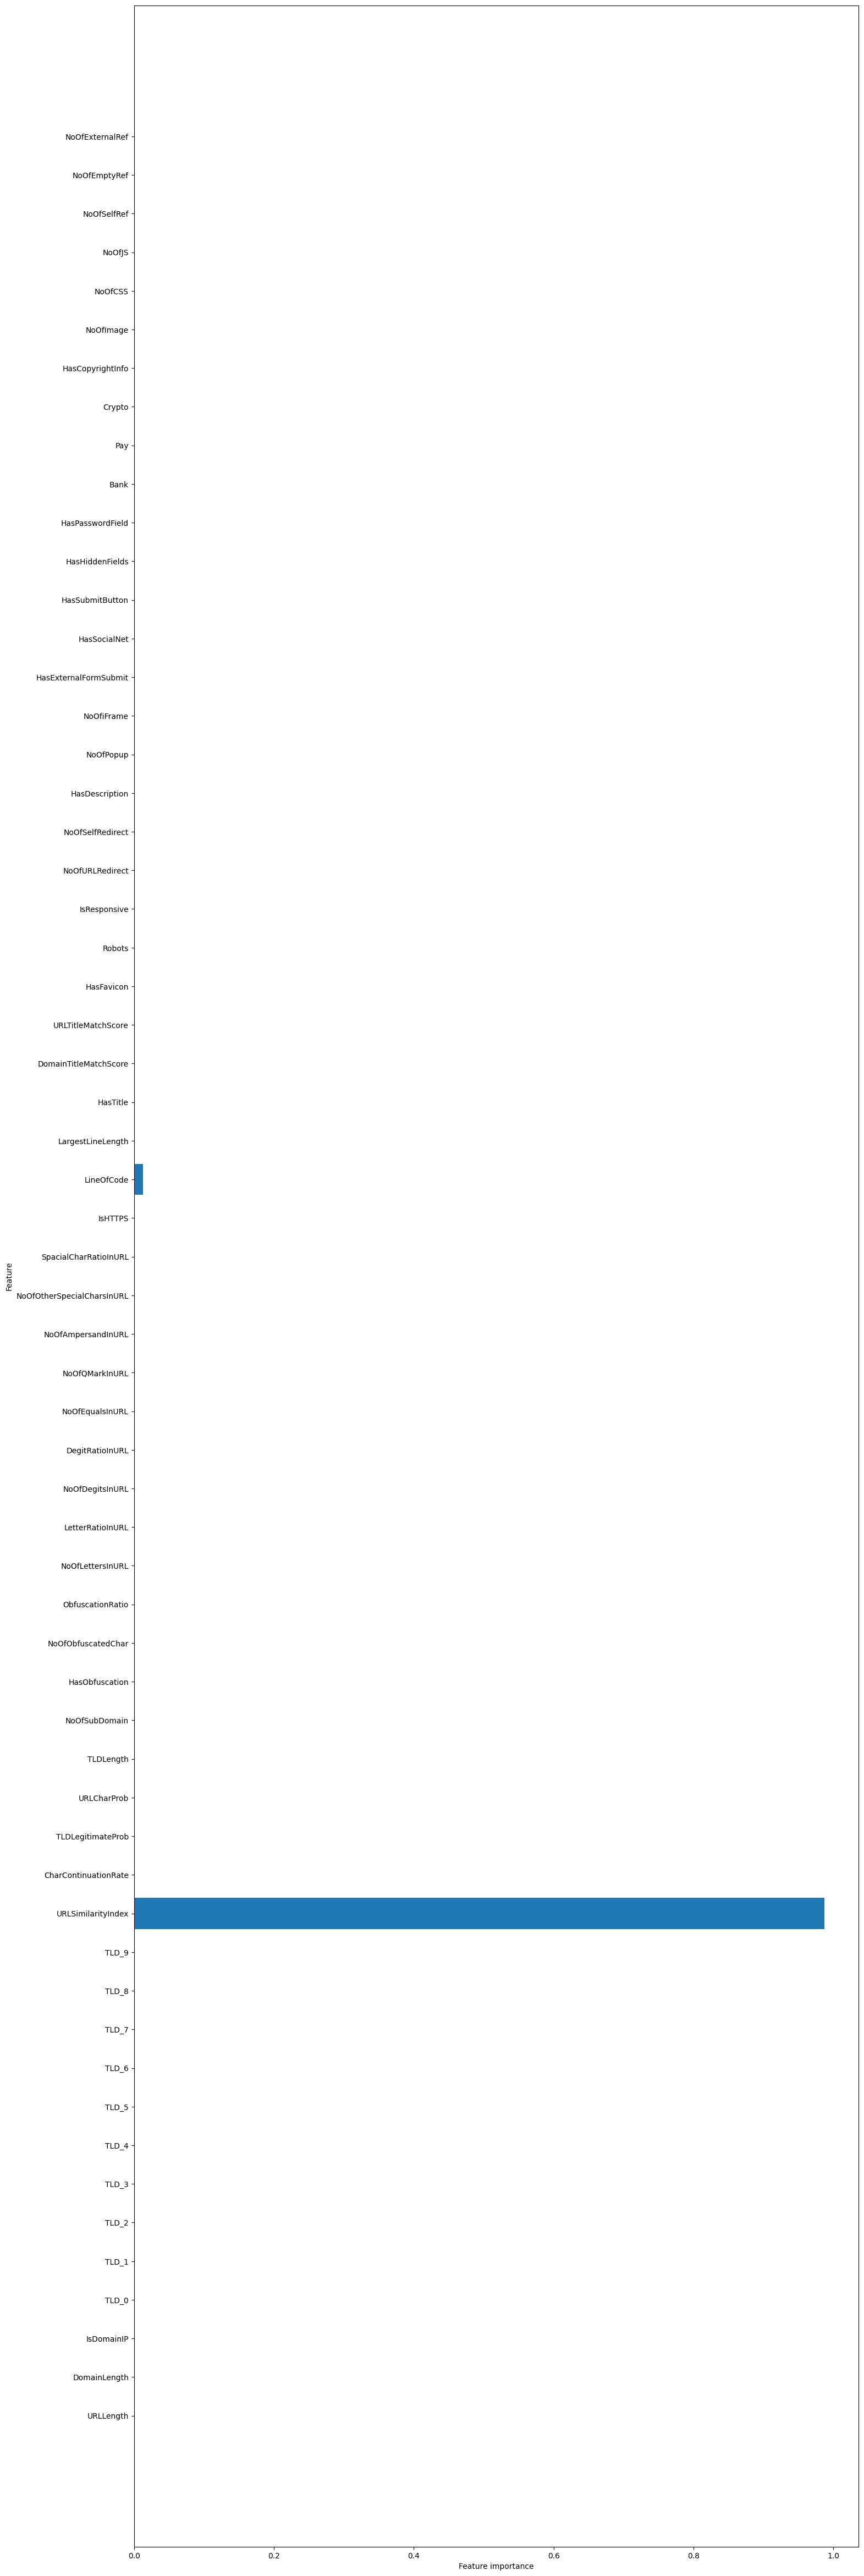

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(17,60))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

removing feature of url similarity index


In [ ]:
X_test_r = X_test.drop("URLSimilarityIndex",axis=1)
X_train_r = X_train.drop("URLSimilarityIndex",axis=1)

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 3)

# fit the model
tree.fit(X_train_r, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test_r)
y_train_tree = tree.predict(X_train_r)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.989
Decision Tree: Accuracy on test Data: 0.990


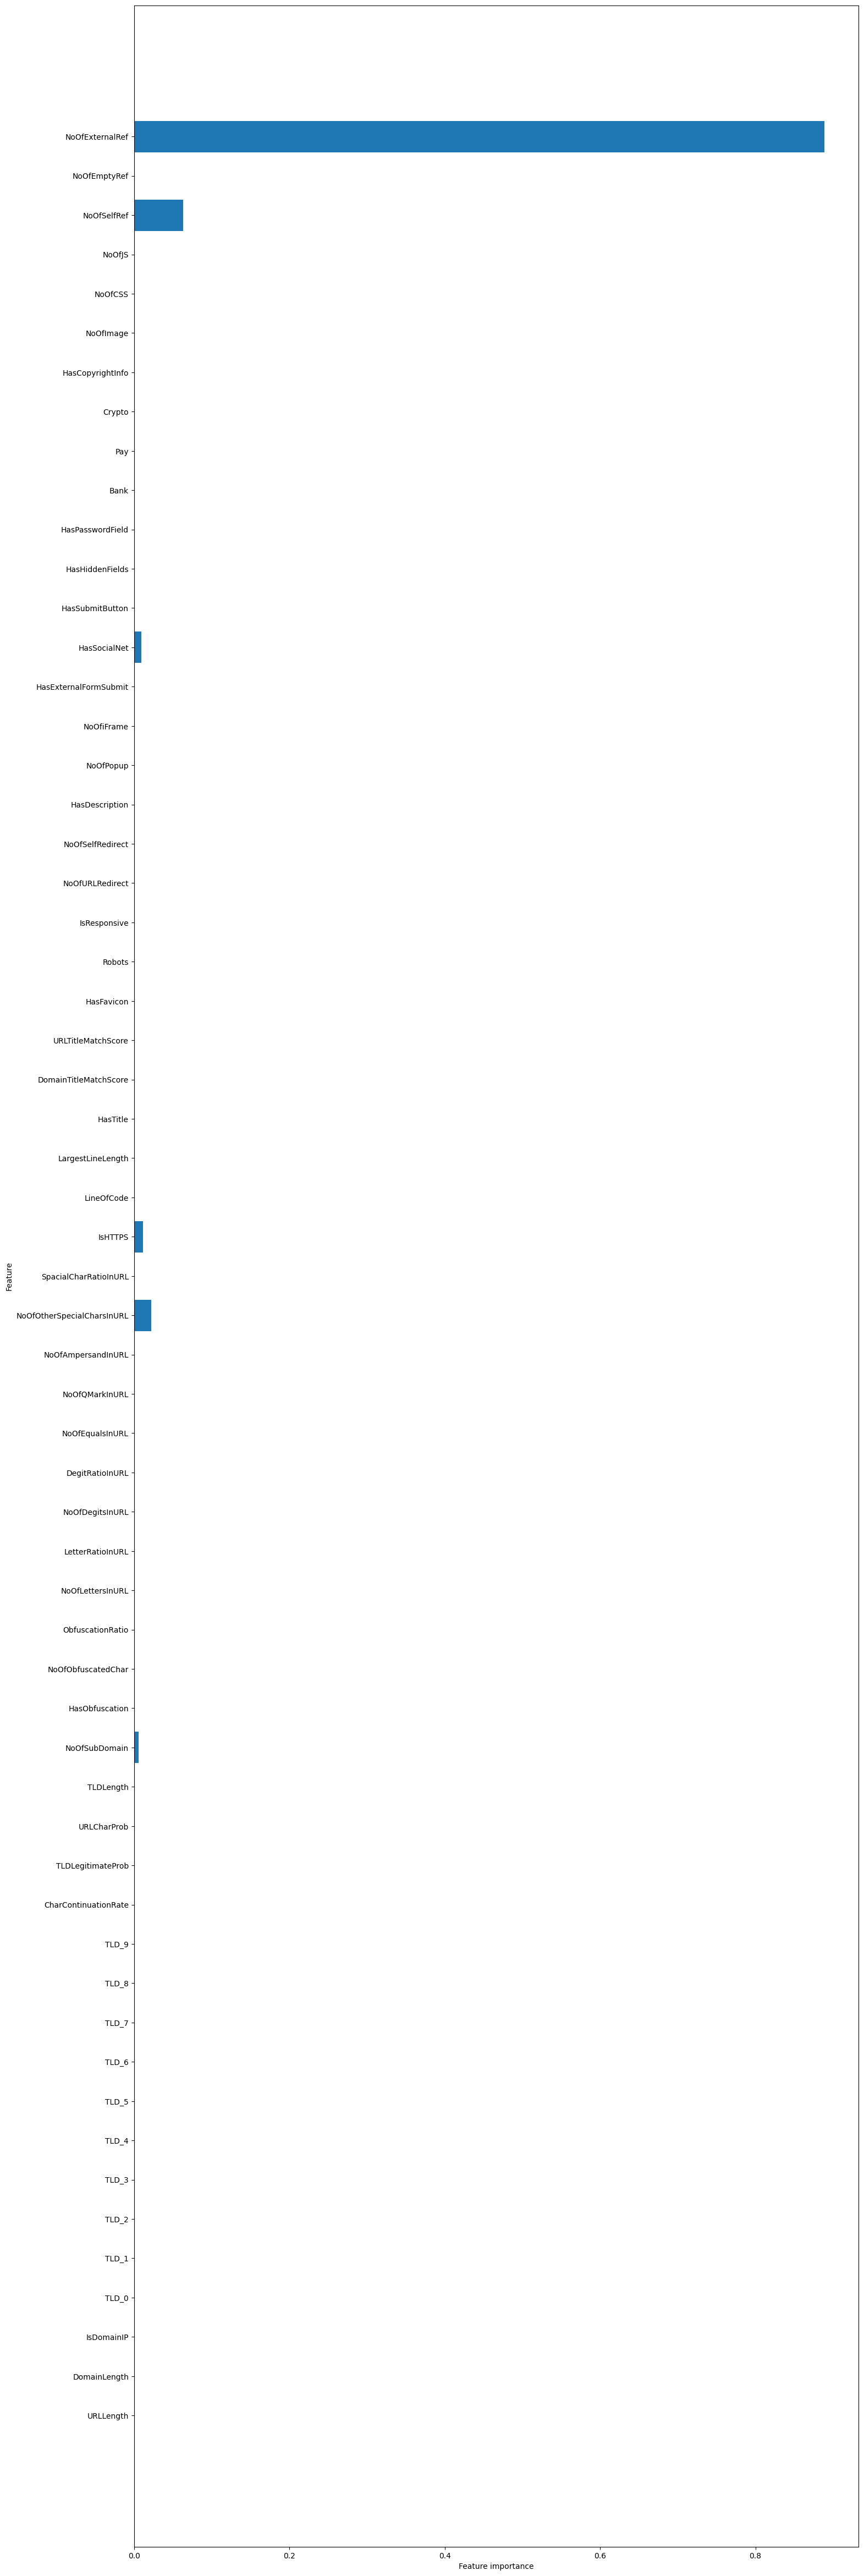

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(17,60))
n_features = X_train_r.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train_r.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Cross validation and paramter tuning


In [ ]:
X_train_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188636 entries, 140271 to 210763
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   188636 non-null  int64  
 1   DomainLength                188636 non-null  int64  
 2   IsDomainIP                  188636 non-null  int64  
 3   TLD_0                       188636 non-null  int64  
 4   TLD_1                       188636 non-null  int64  
 5   TLD_2                       188636 non-null  int64  
 6   TLD_3                       188636 non-null  int64  
 7   TLD_4                       188636 non-null  int64  
 8   TLD_5                       188636 non-null  int64  
 9   TLD_6                       188636 non-null  int64  
 10  TLD_7                       188636 non-null  int64  
 11  TLD_8                       188636 non-null  int64  
 12  TLD_9                       188636 non-null  int64  
 13  CharContinuati

In [ ]:
X_test_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47159 entries, 198182 to 63694
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   47159 non-null  int64  
 1   DomainLength                47159 non-null  int64  
 2   IsDomainIP                  47159 non-null  int64  
 3   TLD_0                       47159 non-null  int64  
 4   TLD_1                       47159 non-null  int64  
 5   TLD_2                       47159 non-null  int64  
 6   TLD_3                       47159 non-null  int64  
 7   TLD_4                       47159 non-null  int64  
 8   TLD_5                       47159 non-null  int64  
 9   TLD_6                       47159 non-null  int64  
 10  TLD_7                       47159 non-null  int64  
 11  TLD_8                       47159 non-null  int64  
 12  TLD_9                       47159 non-null  int64  
 13  CharContinuationRate        471

In [ ]:
# Remove 'URLSimilarityIndex' from both X_train and X_test if not done already
X_train = X_train.drop(columns=['URLSimilarityIndex'], errors='ignore')
X_test = X_test.drop(columns=['URLSimilarityIndex'], errors='ignore')

# Step 1: Cross-validation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree model
tree = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Step 2: Hyperparameter Tuning with GridSearchCV
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found by GridSearchCV:", best_params)
print("Best cross-validation accuracy:", best_score)

# Step 3: Evaluate the model with the best parameters on the test set
# Train a new model with the best parameters
best_tree = grid_search.best_estimator_

# Predict on the test data
y_test_pred = best_tree.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy with best parameters:", test_accuracy)


In [ ]:
print("working")

Results seems overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Limit the depth of the tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree_clf.predict(X_test)
y_train_tree = tree_clf.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


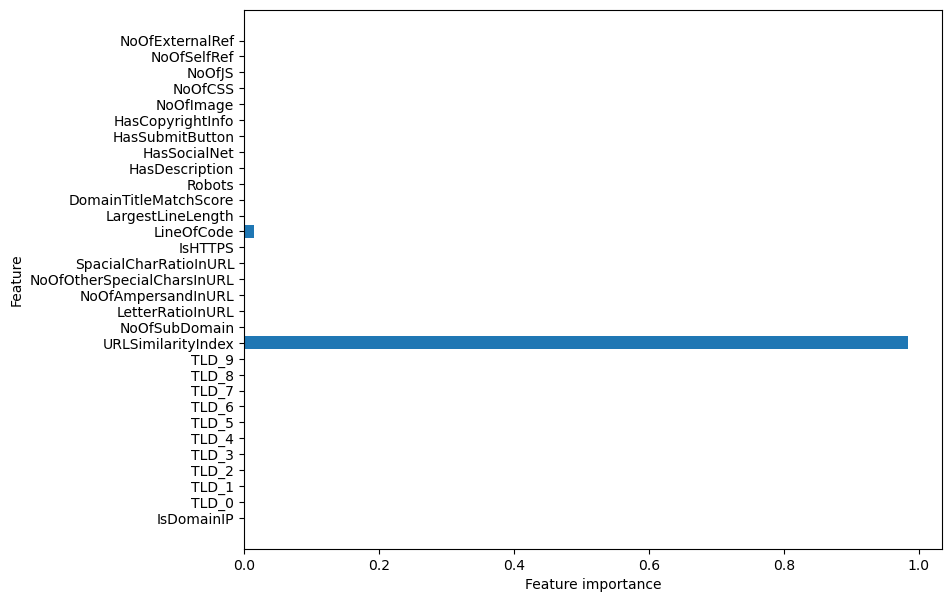

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forrest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000


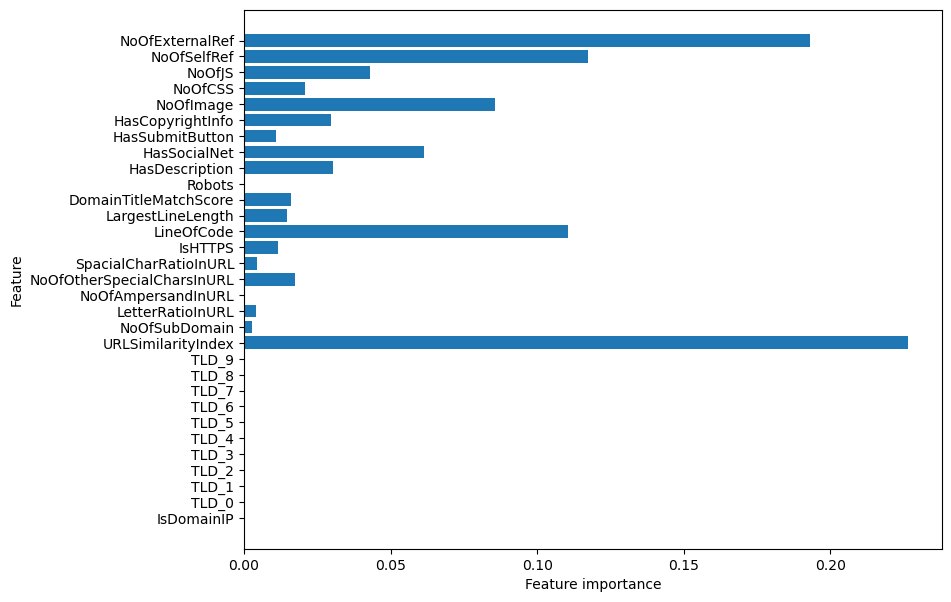

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

MLP

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

c:\Users\sandesh lavshetty\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.998
Multilayer Perceptrons: Accuracy on test Data: 0.998


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

XGBoost Classifier

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 1.000


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

SVM

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

comparison of mofels

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

***Final Edit 🤯🤯🤯😮‍💨😮‍💨😮‍💨😤😤😤***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/url_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.drop(["FILENAME"], axis=1,inplace=True)

In [ ]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation for each numeric feature with the label
correlations = {}
for column in df.drop('label', axis=1).select_dtypes(include=['number']).columns:
    correlations[column], _ = pointbiserialr(df[column], df['label'])

# Sort correlations in descending order
correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

print("Point Biserial Correlation of all numeric features with 'label':\n", correlations)


Point Biserial Correlation of all numeric features with 'label':
 {'URLSimilarityIndex': 0.8603580349950478, 'HasSocialNet': 0.7842545048611291, 'HasCopyrightInfo': 0.7433575121575651, 'HasDescription': 0.6902317838721045, 'IsHTTPS': 0.6091318990621848, 'DomainTitleMatchScore': 0.58490458154694, 'HasSubmitButton': 0.5785609362364279, 'IsResponsive': 0.5486075477020952, 'URLTitleMatchScore': 0.5394186582391132, 'SpacialCharRatioInURL': -0.5335367395646039, 'HasHiddenFields': 0.5077314631770089, 'HasFavicon': 0.4937106614080138, 'URLCharProb': 0.4697485899604052, 'CharContinuationRate': 0.467735299834097, 'HasTitle': 0.4597246819667584, 'DegitRatioInURL': -0.43203214846933524, 'Robots': 0.39261993295672315, 'NoOfJS': 0.3735000743129704, 'LetterRatioInURL': -0.3677943369422825, 'Pay': 0.3597465577665234, 'NoOfOtherSpecialCharsInURL': -0.3588907898975935, 'NoOfSelfRef': 0.31621093459414684, 'DomainLength': -0.28315188979710243, 'NoOfImage': 0.2746576771104945, 'LineOfCode': 0.2722569038851

In [ ]:
from sklearn.feature_selection import mutual_info_classif
columns = df.select_dtypes(include=['object']).columns
# Features and target variable
X = df.drop('label', axis=1)
X = X.drop(columns, axis=1)
y = df['label']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information of all features with 'label':\n", mutual_info_df)


Mutual Information of all features with 'label':
                        Feature  Mutual Information
3           URLSimilarityIndex            0.681215
22                  LineOfCode            0.601294
49             NoOfExternalRef            0.561386
44                   NoOfImage            0.543236
47                 NoOfSelfRef            0.527919
46                      NoOfJS            0.500494
23           LargestLineLength            0.488360
45                     NoOfCSS            0.447381
36                HasSocialNet            0.417042
13            LetterRatioInURL            0.382787
43            HasCopyrightInfo            0.353222
32              HasDescription            0.306973
21                     IsHTTPS            0.256449
19  NoOfOtherSpecialCharsInURL            0.242436
25       DomainTitleMatchScore            0.219654
37             HasSubmitButton            0.209054
20       SpacialCharRatioInURL            0.205441
5            TLDLegitimateProb  

In [ ]:
low_mi_features = mutual_info_df[mutual_info_df["Mutual Information"] < 0.2]["Feature"]
low_mi_features


,Feature
5,TLDLegitimateProb
26,URLTitleMatchScore
29,IsResponsive
4,CharContinuationRate
14,NoOfDegitsInURL
15,DegitRatioInURL
48,NoOfEmptyRef
0,URLLength
34,NoOfiFrame
38,HasHiddenFields


In [ ]:
low_mi_features.to_list()

['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'CharContinuationRate',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEmptyRef',
 'URLLength',
 'NoOfiFrame',
 'HasHiddenFields',
 'HasTitle',
 'NoOfLettersInURL',
 'HasFavicon',
 'URLCharProb',
 'Robots',
 'DomainLength',
 'Pay',
 'NoOfSubDomain',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'NoOfQMarkInURL',
 'NoOfEqualsInURL',
 'HasExternalFormSubmit',
 'HasPasswordField',
 'Crypto',
 'IsDomainIP',
 'NoOfSelfRedirect',
 'NoOfAmpersandInURL',
 'ObfuscationRatio',
 'NoOfURLRedirect',
 'NoOfObfuscatedChar',
 'HasObfuscation']

In [ ]:
m_df = df.drop(['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'CharContinuationRate',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEmptyRef',
 'URLLength',
 'NoOfiFrame',
 'HasHiddenFields',
 'HasTitle',
 'NoOfLettersInURL',
 'HasFavicon',
 'URLCharProb',
 'Robots',
 'DomainLength',
 'Pay',
 'NoOfSubDomain',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'NoOfQMarkInURL',
 'NoOfEqualsInURL',
 'HasExternalFormSubmit',
 'HasPasswordField',
 'Crypto',
 'IsDomainIP',
 'NoOfSelfRedirect',
 'NoOfAmpersandInURL',
 'ObfuscationRatio',
 'NoOfURLRedirect',
 'NoOfObfuscatedChar',
 'HasObfuscation'], axis=1)

In [ ]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['TLD'])
o_df = binary_encoder.fit_transform(m_df)


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = o_df['label']
X = o_df.drop(['label','URL','Domain','Title'],axis=1)
X.shape, y.shape

((235795, 27), (235795,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TLD_0                       235795 non-null  int64  
 1   TLD_1                       235795 non-null  int64  
 2   TLD_2                       235795 non-null  int64  
 3   TLD_3                       235795 non-null  int64  
 4   TLD_4                       235795 non-null  int64  
 5   TLD_5                       235795 non-null  int64  
 6   TLD_6                       235795 non-null  int64  
 7   TLD_7                       235795 non-null  int64  
 8   TLD_8                       235795 non-null  int64  
 9   TLD_9                       235795 non-null  int64  
 10  URLSimilarityIndex          235795 non-null  float64
 11  LetterRatioInURL            235795 non-null  float64
 12  NoOfOtherSpecialCharsInURL  235795 non-null  int64  
 13  SpacialCharRat

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((188636, 27), (47159, 27))

**1. Decision Tree🌴**

In [ ]:
# Remove 'URLSimilarityIndex' from both X_train and X_test if not done already
X_train = X_train.drop(columns=['URLSimilarityIndex'], errors='ignore')
X_test = X_test.drop(columns=['URLSimilarityIndex'], errors='ignore')

# Step 1: Cross-validation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree model
tree = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Step 2: Hyperparameter Tuning with GridSearchCV
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found by GridSearchCV:", best_params)
print("Best cross-validation accuracy:", best_score)

# Step 3: Evaluate the model with the best parameters on the test set
# Train a new model with the best parameters
best_tree = grid_search.best_estimator_

# Predict on the test data
y_test_pred = best_tree.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy with best parameters:", test_accuracy)


Cross-validation scores: [0.99827714 0.99817107 0.99878071 0.99856866 0.99859517]
Mean cross-validation accuracy: 0.9984785523516757
Best parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9985156600700812
Test accuracy with best parameters: 0.9987277083907632


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def confusion_mat(y_test, y_pred):
  # Generate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Create a Confusion Matrix
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

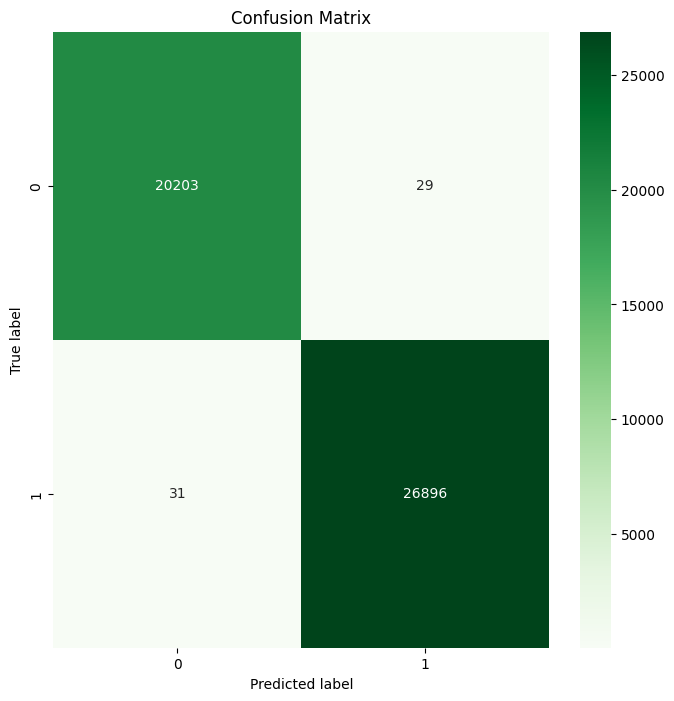

In [ ]:
confusion_mat(y_test, y_test_pred)

In [ ]:
def feature_imp(X_train,model):
  #checking the feature improtance in the model
    plt.figure(figsize=(17,60))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

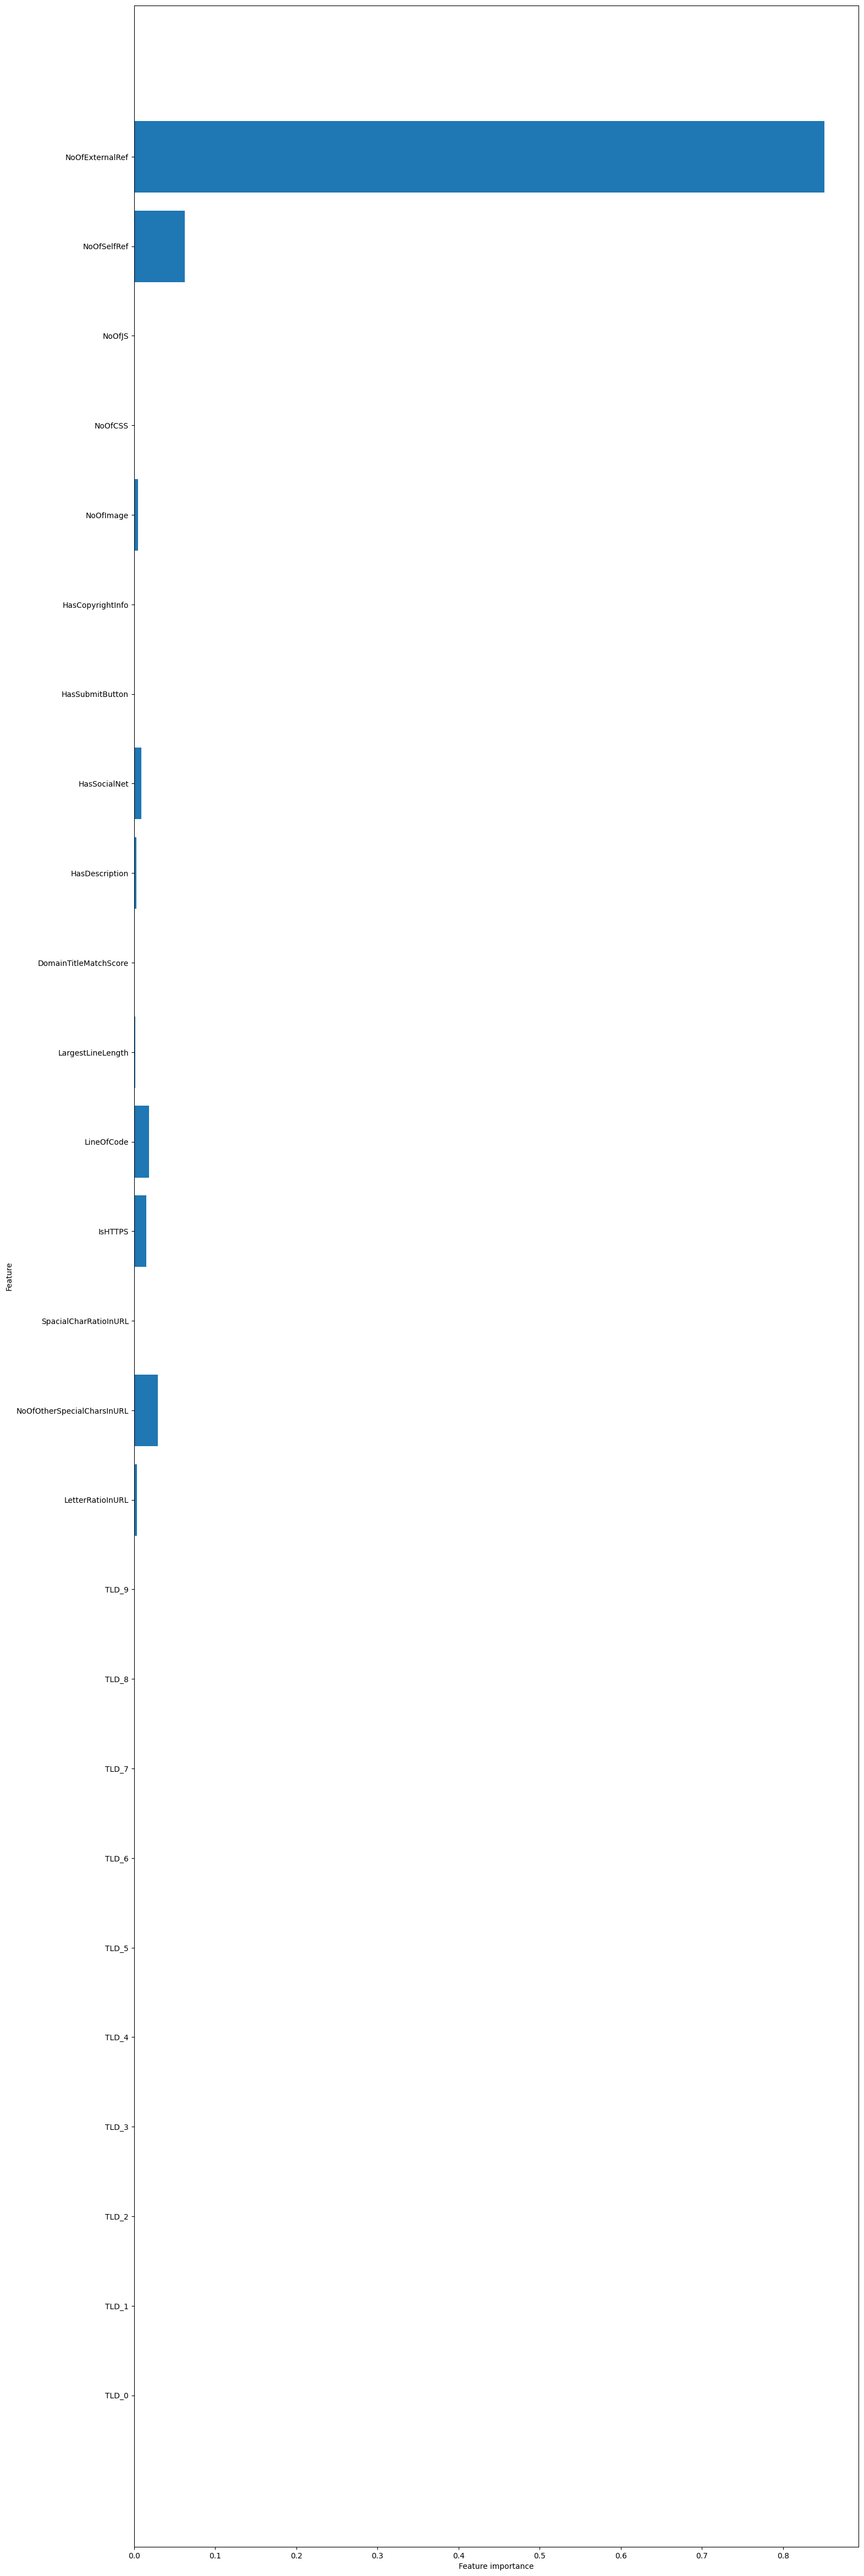

In [ ]:
feature_imp(X_train,best_tree)

**2. Random forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# Ensure 'URLSimilarityIndex' is removed from both X_train and X_test if not done already
X_train = X_train.drop(columns=['URLSimilarityIndex'], errors='ignore')
X_test = X_test.drop(columns=['URLSimilarityIndex'], errors='ignore')

# Step 1: Cross-Validation
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Random Forest Cross-validation scores:", cv_scores_rf)
print("Random Forest Mean cross-validation accuracy:", cv_scores_rf.mean())

# Step 2: Hyperparameter Tuning with GridSearchCV
# Define the parameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # Number of trees in the forest
    'max_depth': [10, 20, 30, None],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]                # Minimum samples required at each leaf node
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best cross-validation score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters found by GridSearchCV for Random Forest:", best_params_rf)
print("Best cross-validation accuracy for Random Forest:", best_score_rf)

# Step 3: Evaluate the model with the best parameters on the test set
# Train a new Random Forest model with the best parameters
best_rf = grid_search_rf.best_estimator_

# Predict on the test data
y_test_pred_rf = best_rf.predict(X_test)

# Calculate test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test accuracy with best parameters for Random Forest:", test_accuracy_rf)


Random Forest Cross-validation scores: [0.99960242 0.99941686 0.99973494 0.99962891 0.99946988]
Random Forest Mean cross-validation accuracy: 0.9995706014132197


In [ ]:
feature_imp(X_train,best_rf)

In [ ]:
confusion_mat(y_test, y_test_pred_rf)

**3.XGBoost**

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# Ensure 'URLSimilarityIndex' is removed from both X_train and X_test if not done already
X_train = X_train.drop(columns=['URLSimilarityIndex'], errors='ignore')
X_test = X_test.drop(columns=['URLSimilarityIndex'], errors='ignore')

# Step 1: Cross-Validation
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("XGBoost Cross-validation scores:", cv_scores_xgb)
print("XGBoost Mean cross-validation accuracy:", cv_scores_xgb.mean())

# Step 2: Hyperparameter Tuning with GridSearchCV
# Define the parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_depth': [3, 5, 7],                      # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],           # Learning rate
    'subsample': [0.8, 1.0],                     # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]               # Subsample ratio of columns when constructing each tree
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best cross-validation score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best parameters found by GridSearchCV for XGBoost:", best_params_xgb)
print("Best cross-validation accuracy for XGBoost:", best_score_xgb)

# Step 3: Evaluate the model with the best parameters on the test set
# Train a new XGBoost model with the best parameters
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test data
y_test_pred_xgb = best_xgb.predict(X_test)

# Calculate test accuracy
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("Test accuracy with best parameters for XGBoost:", test_accuracy_xgb)


In [ ]:
confusion_mat(y_test, y_test_pred_xgb)

In [ ]:
feature_imp(X_train,best_xgb)

**4.SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Scaling and Cross-Validation
# SVM often performs better with standardized data, so we'll use a pipeline to combine scaling and SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Perform 5-fold cross-validation
cv_scores_svm = cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print("SVM Cross-validation scores:", cv_scores_svm)
print("SVM Mean cross-validation accuracy:", cv_scores_svm.mean())

# Step 2: Hyperparameter Tuning with GridSearchCV
# Define the parameter grid for tuning
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],                  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],      # Kernel type
    'svm__gamma': ['scale', 'auto', 0.01, 0.1]     # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best cross-validation score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best parameters found by GridSearchCV for SVM:", best_params_svm)
print("Best cross-validation accuracy for SVM:", best_score_svm)

# Step 3: Evaluate the model with the best parameters on the test set
# Train a new SVM model with the best parameters
best_svm = grid_search_svm.best_estimator_

# Predict on the test data
y_test_pred_svm = best_svm.predict(X_test)

# Calculate test accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Test accuracy with best parameters for SVM:", test_accuracy_svm)


In [ ]:
feature_imp(X_train,best_svm)

In [ ]:
confusion_mat(y_test, y_test_pred_svm)

Result Synopsis 🪖🪖

1. Decision tree

In [ ]:
# Print the resultsimport pickle
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your model from the pickle file
with open("path_to_your_model.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming x_test and y_test are already loaded or defined
# Make predictions using the loaded model
y_pred = model.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
